File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Bot               ID3                0.96            0.94            0.97            0.95            0.0338         


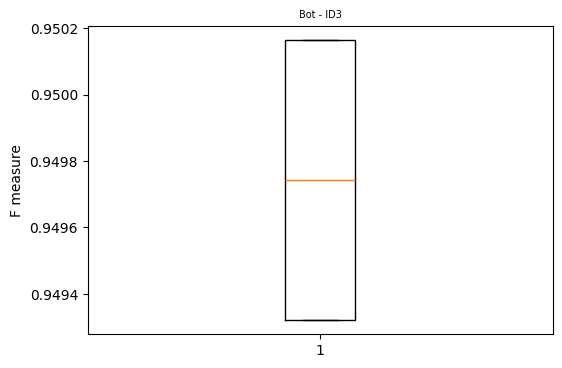


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DDoS              ID3                0.96            0.94            0.97            0.96            0.4432         


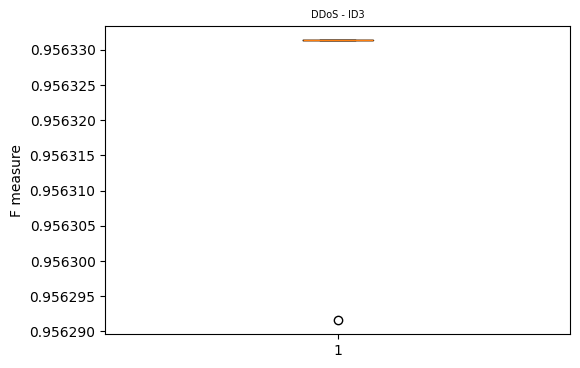


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS GoldenEye     ID3                0.99            0.99            0.99            0.99            0.0662         


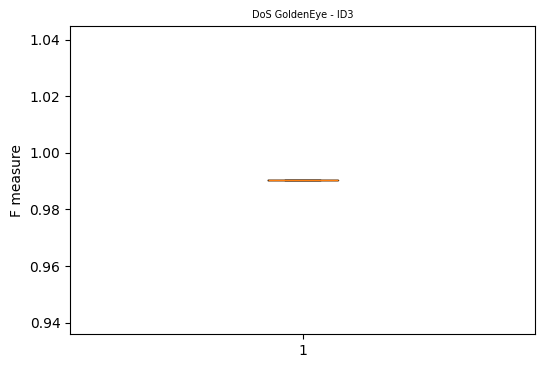


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Hulk          ID3                0.96            0.95            0.96            0.95            1.5984         


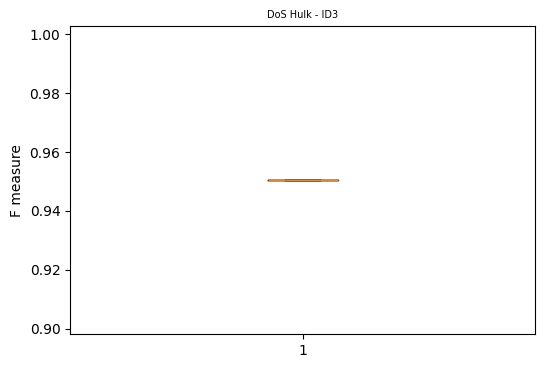


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS Slowhttptest  ID3                0.98            0.99            0.97            0.98            0.0411         


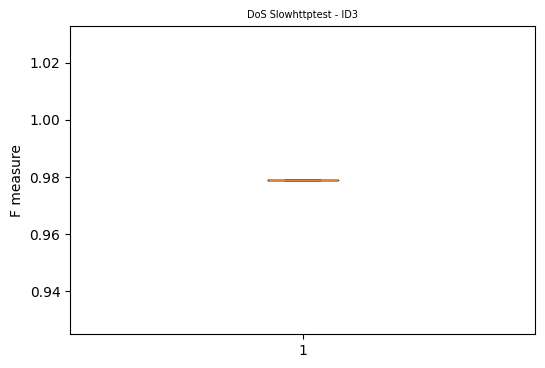


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
DoS slowloris     ID3                0.96            0.97            0.94            0.95            0.0386         


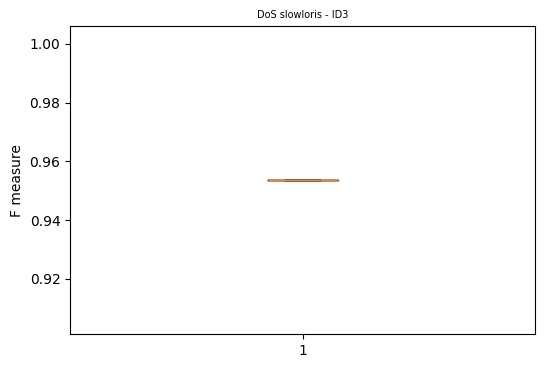


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
FTP-Patator       ID3                1.0             1.0             1.0             1.0             0.0269         


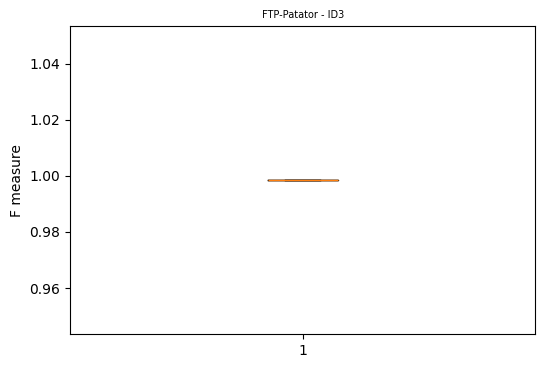


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Heartbleed        ID3                1.0             1.0             1.0             1.0             0.011          


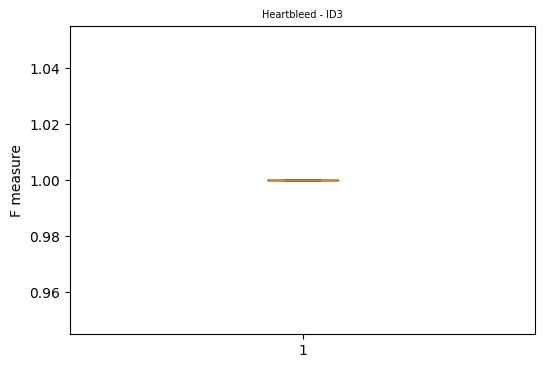


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Infiltration      ID3                0.84            0.82            0.76            0.78            0.0118         


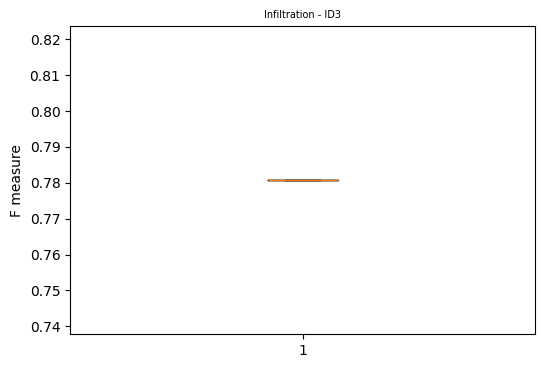


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
PortScan          ID3                1.0             1.0             1.0             1.0             1.2543         


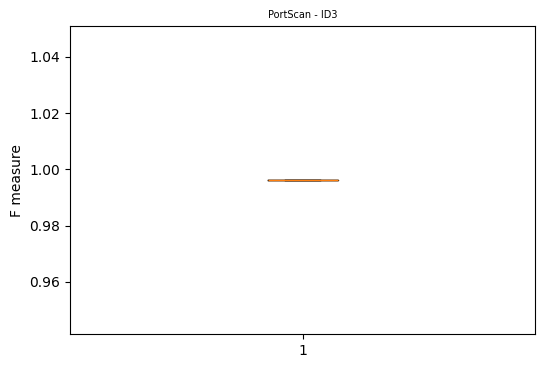


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
SSH-Patator       ID3                0.96            0.95            0.97            0.95            0.0531         


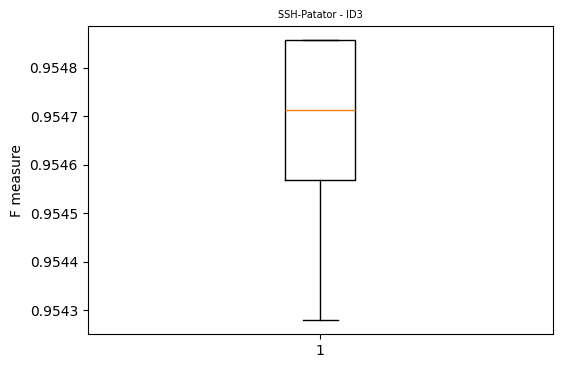


------------------------------------------------------------------------------------------------------


File              ML algorithm       accuracy        Precision       Recall          F1-score        Time           
Web Attack        ID3                0.96            0.96            0.94            0.95            0.0351         


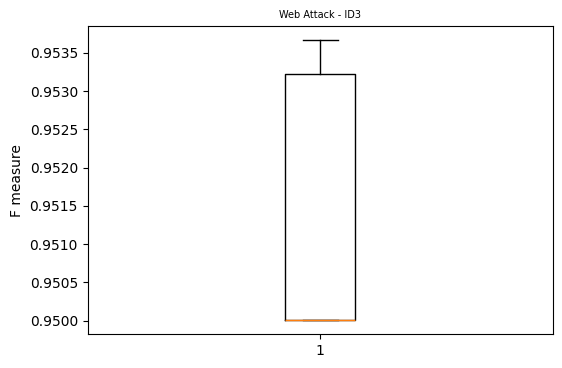


------------------------------------------------------------------------------------------------------


Mission accomplished!
Total operation time: =  45.967599630355835 seconds


In [3]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import csv
import time
import warnings
warnings.filterwarnings("ignore")

result="./results/results_1.csv" #a CSV file is named in which the results are saved.
csv_files=os.listdir("attacks") # CSV files names: #The names of the files in the attacks folder are taken and assigned to a list (csv_files).
path=".\\attacks\\"
repetition=10

def folder(f_name):  #this function creates a folder named "results" and "result_graph_1" in the program directory.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print("The folder could not be created!")

folder_name = "./results/"
folder(folder_name)
folder_name = "./results/result_graph_1/"
folder(folder_name)

# Keep only ID3 in the machine learning algorithms dictionary (ml_list).
ml_list = {
    "ID3": DecisionTreeClassifier(max_depth=5, criterion="entropy")
}

# the features to be used for each attack type is defined in a dictionary (features).
features = {
    "Bot": ["Bwd Packet Length Mean", "Flow IAT Max", "Flow Duration", "Flow IAT Min", "Label"],
    "DDoS": ["Bwd Packet Length Std", "Total Backward Packets", "Fwd IAT Total", "Flow Duration", "Label"],
    "DoS GoldenEye": ["Flow IAT Max", "Bwd Packet Length Std", "Flow IAT Min", "Total Backward Packets", "Label"],
    "DoS Hulk": ["Bwd Packet Length Std", "Fwd Packet Length Std", "Fwd Packet Length Max", "Flow IAT Min", "Label"],
    "DoS Slowhttptest": ["Flow IAT Mean", "Fwd Packet Length Min", "Bwd Packet Length Mean", "Total Length of Bwd Packets", "Label"],
    "DoS slowloris": ["Flow IAT Mean", "Total Length of Bwd Packets", "Bwd Packet Length Mean", "Total Fwd Packets", "Label"],
    "FTP-Patator": ["Fwd Packet Length Max", "Fwd Packet Length Std", "Fwd Packet Length Mean", "Bwd Packet Length Std", "Label"],
    "Heartbleed": ["Total Backward Packets", "Fwd Packet Length Max", "Flow IAT Min", "Bwd Packet Length Max", "Label"],
    "Infiltration": ["Fwd Packet Length Max", "Fwd Packet Length Mean", "Flow Duration", "Total Length of Fwd Packets", "Label"],
    "PortScan": ["Flow Bytes/s", "Total Length of Fwd Packets", "Fwd IAT Total", "Flow Duration", "Label"],
    "SSH-Patator": ["Fwd Packet Length Max", "Flow Duration", "Flow IAT Max", "Total Length of Fwd Packets", "Label"],
    "Web Attack": ["Bwd Packet Length Std", "Total Length of Fwd Packets", "Flow Bytes/s", "Flow IAT Max", "Label"]
}

seconds = time.time()  # time stamp for all processing time

with open(result, "w", newline="", encoding="utf-8") as f:  # a CSV file is created to save the results obtained.
    wrt = csv.writer(f)
    wrt.writerow(["File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"])

for j in csv_files:  # this loop runs on the list containing the filenames. Operations are repeated for all attack files.
    print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % ("File", "ML algorithm", "accuracy", "Precision", "Recall", "F1-score", "Time"))  # print output header
    a = []
    
    feature_list = list(features[j[0:-4]])
    df = pd.read_csv(path + j, usecols=feature_list)  # read an attack file.
    df = df.fillna(0)
    attack_or_not = []
    for i in df["Label"]:  # it changes the normal label to "1" and the attack tag to "0" for use in the machine learning algorithm
        if i == "BENIGN":
            attack_or_not.append(1)
        else:
            attack_or_not.append(0)
    df["Label"] = attack_or_not

    y = df["Label"]  # this section separates the label and the data into two separate pieces, as Label=y Data=X 
    del df["Label"]
    feature_list.remove('Label')
    X = df[feature_list]

    for ii in ml_list:  # this loop runs on the list containing the machine learning algorithm names. Operations are repeated for the ID3 algorithm.
        precision = []
        recall = []
        f1 = []
        accuracy = []
        t_time = []
        for i in range(repetition):  # This loop allows cross-validation and machine learning algorithm to be repeated 10 times.
            second = time.time()  # time stamp for processing time

            # Cross-validation
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=repetition)

            # Apply ID3 algorithm
            clf = ml_list[ii]
            clf.fit(X_train, y_train)
            predict = clf.predict(X_test)

            # Calculate metrics
            f_1 = f1_score(y_test, predict, average='macro')
            pr = precision_score(y_test, predict, average='macro')
            rc = recall_score(y_test, predict, average='macro')

            precision.append(float(pr))
            recall.append(float(rc))
            f1.append(float(f_1))
            accuracy.append(clf.score(X_test, y_test))
            t_time.append(float((time.time() - second)))

        print('%-17s %-17s  %-15s %-15s %-15s %-15s %-15s' % (j[0:-4], ii, str(round(np.mean(accuracy), 2)), str(round(np.mean(precision), 2)),
                                                               str(round(np.mean(recall), 2)), str(round(np.mean(f1), 2)), str(round(np.mean(t_time), 4))))

        with open(result, "a", newline="", encoding="utf-8") as f:  # Save all the values found in the opened file.
            wrt = csv.writer(f)
            for i in range(0, len(t_time)):
                wrt.writerow([j[0:-4], ii, accuracy[i], precision[i], recall[i], f1[i], t_time[i]])  # Save results in CSV file.
        a.append(f1)

    # Create box plots for the ID3 results
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 4), sharey=True)
    axes.boxplot(a[0])
    axes.set_title(str(j[0:-4]) + " - ID3", fontsize=7)
    axes.set_ylabel("F measure")
    
    plt.savefig(folder_name + j[0:-4] + ".pdf", bbox_inches='tight', orientation='portrait', format='pdf')
    plt.show()
    print("\n------------------------------------------------------------------------------------------------------\n\n")

print("Mission accomplished!")
print("Total operation time: = ", time.time() - seconds, "seconds")
